In [51]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
% matplotlib inline  

#import the necessary modelling algos.

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression


data = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
print(data.head(5))



              datetime  season  holiday  ...    casual  registered  count
0  2011-01-01 00:00:00       1        0  ...         3          13     16
1  2011-01-01 01:00:00       1        0  ...         8          32     40
2  2011-01-01 02:00:00       1        0  ...         5          27     32
3  2011-01-01 03:00:00       1        0  ...         3          10     13
4  2011-01-01 04:00:00       1        0  ...         0           1      1

[5 rows x 12 columns]


In [52]:
print(data["count"].describe())

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64


In [54]:
data.shape

(10886, 12)

In [55]:
test.shape

(6493, 9)

In [56]:
# Extract hours from datetime
data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month

test['datetime'] = pd.to_datetime(test['datetime'])
test['hour'] = data['datetime'].dt.hour
test['month'] = data['datetime'].dt.month

In [57]:
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')


test['season'] = test.season.astype('category')
test['month'] = test.month.astype('category')
test['hour'] = test.hour.astype('category')
test['holiday'] = test.holiday.astype('category')
test['workingday'] = test.workingday.astype('category')
test['weather'] = test.weather.astype('category')


In [58]:
data.drop('datetime',axis=1,inplace=True)
test.drop('datetime',axis=1,inplace=True)

In [ ]:
data.columns

In [ ]:
test.columns

In [59]:
# Removing outliers

dataWithoutOutliers = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())] 


In [60]:
print ("Shape Of The Before Ouliers: ",data.shape)
print ("Shape Of The After Ouliers: ",dataWithoutOutliers.shape)



Shape Of The Before Ouliers:  (10886, 13)
Shape Of The After Ouliers:  (10739, 13)


In [61]:
dataTrain = pd.read_csv("../input/train.csv")
dataTest = pd.read_csv("../input/test.csv")

MergeData = dataTrain.append(dataTest)
MergeData.reset_index(inplace=True)
MergeData.drop('index',inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [62]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

MergeData["date"] = MergeData.datetime.apply(lambda x : x.split()[0])
MergeData["hour"] = MergeData.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
MergeData["year"] = MergeData.datetime.apply(lambda x : x.split()[0].split("-")[0])
MergeData["weekday"] = MergeData.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
MergeData["month"] = MergeData.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)



In [64]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = MergeData[MergeData["windspeed"]==0]
dataWindNot0 = MergeData[MergeData["windspeed"]!=0]
rfg_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfg_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfg_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
MergeData = dataWindNot0.append(dataWind0)
MergeData.reset_index(inplace=True)
MergeData.drop('index',inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [66]:
for var in categoricalFeatureNames:
    MergeData[var] = MergeData[var].astype("category")

In [67]:


train = MergeData[pd.notnull(MergeData['count'])].sort_values(by=["datetime"])
test = MergeData[~pd.notnull(MergeData['count'])].sort_values(by=["datetime"])
datetimecol = test["datetime"]
yLabels = train["count"]
yLablesRegistered = train["registered"]
yLablesCasual = train["casual"]



In [68]:
dataTrain  = train.drop(dropFeatures,axis=1)
dataTest  = test.drop(dropFeatures,axis=1)

In [69]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))



In [70]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))



RMSLE Value For Random Forest:  0.10282671359737781


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


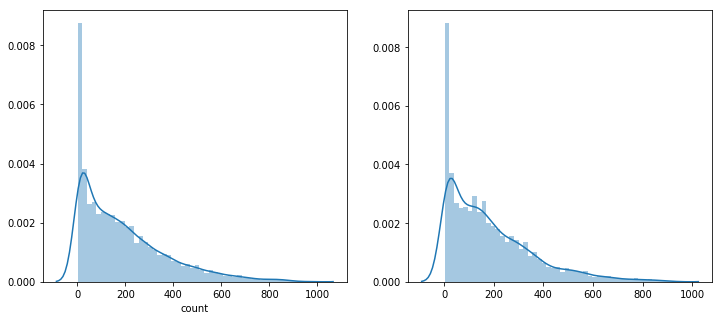

In [71]:
predsTest = rfModel.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predsTest),ax=ax2,bins=50)



In [72]:
[max(0, x) for x in np.exp(predsTest)]

[11.814535080057958,
 5.949311867658574,
 3.781010715963535,
 4.028339251977749,
 3.4979944740102225,
 6.79215883130742,
 36.83737363930725,
 89.78485787993397,
 206.96523378191162,
 123.78677819886923,
 59.962879464509456,
 60.398443622732344,
 75.63352217674603,
 71.51903099153958,
 74.21405100866431,
 78.89991384317688,
 89.38444582480675,
 199.92620442223563,
 176.24229237254437,
 102.38985273023064,
 70.94530535438231,
 48.22727093439843,
 44.3391449808005,
 22.847614174114973,
 15.069838387056029,
 6.568171942805496,
 4.438834404882699,
 3.0028681057380013,
 3.0704491606517266,
 3.6357729750859518,
 33.468465805698344,
 83.93659246906466,
 194.43224706260858,
 128.91614579688724,
 48.43956928325096,
 62.63007068125648,
 70.90271597690484,
 66.41855182469969,
 62.51590892553214,
 60.09256489938826,
 83.2846756740198,
 141.7419149628127,
 134.82552936191,
 94.607682463785,
 58.459628499378006,
 42.5169227408974,
 33.00537753576971,
 19.788443663946897,
 20.700069178967215,
 17.9478

In [73]:
np.exp(predsTest)

array([ 11.81453508,   5.94931187,   3.78101072, ..., 139.47503857,
       111.3727036 ,  57.28114311])

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.18885787703162216


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


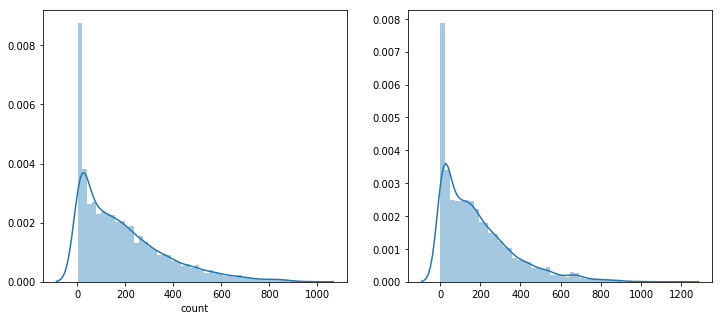

In [75]:
gbmpredsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(gbmpredsTest),ax=ax2,bins=50)



In [76]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(gbmpredsTest)]
    })
submission.to_csv('my_submission_19.csv', index=False)
